In [1]:
using Plots, LaTeXStrings, QuadGK

In [2]:
function diffusion(r,t,D)
    return exp(-r^2/(4*D*t))/(4*pi*D*t)
end

function convection(f::Function,r,t,chi)
    return f.(r.-chi*t^2/2) 
end


convection (generic function with 1 method)

In [3]:
r = 0:10:1000
t0 = 1000
t = 0
D = 75
chi = -0.5

quadgk(rs -> diffusion(rs,5,D),-100000,100000, rtol=1e-8)

(0.007283656203947195, 4.912663426972039e-12)

In [4]:
convection(x->diffusion(x,t0,D),-10,0,chi)

1.06067933523438e-6

In [19]:
phi_0 = convection(x->diffusion(x,t0,D),r,0,chi)
t = 0:10:3600
mp4(@animate( for (i,ts) in enumerate(t)
    phi = convection(x->diffusion(x,t0,D),r,ts,chi)
    #print(ts, "  ", phi, "\n")
    plot(r,phi,
        xaxis = (L"r"),
        yaxis = (L"\phi"),
        label="")
    plot!(r,phi_0,
            label="")
end), "convection.mp4",fps=10)


┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\roost_finding\convection.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\jWNMG\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\roost_finding\\convection.mp4")

In [156]:
t = 1:1:3600
msd = Array{Float64}(undef,length(t))
for (i,ts) in enumerate(t)
    msd[i], s = quadgk(r -> diffusion(D,chi,ts,r,eps), 0, 3000, rtol=1e-8)
end

In [ ]:
ylim=(minimum(conv_phi), maximum(conv_phi))
mp4(@animate( for (i,ts) in enumerate(t)
    plot(r,conv_phi[1,:],
        xaxis = (L"r"),
        yaxis = (L"\phi"),
        linealpha=0, label="")
    plot!(r,conv_phi[i,:],
            label="")
end), "convection.mp4",fps=10)


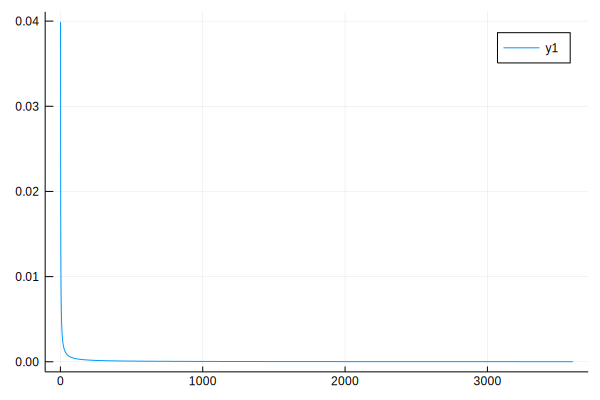

In [157]:
plot(t,msd)

In [101]:
t = 10:10:3600
r = 10:10:3000
T = 10

diff_phi = Array{Float64}(undef,length(t),length(r))
conv_phi = Array{Float64}(undef,length(t),length(r))

for (i,ts) in enumerate(t)
    for (j,rs) in enumerate(r)
        diff_phi[i,j] = diffusion(D,chi,ts,rs,eps)
        conv_phi[i,j] = convection(D,chi,ts,rs,eps,T)
    end
end


In [102]:
ylim=(minimum(conv_phi), maximum(conv_phi))
mp4(@animate( for (i,ts) in enumerate(t)
    plot(r,conv_phi[1,:],
        xaxis = (L"r"),
        yaxis = (L"\phi"),
        linealpha=0, label="")
    plot!(r,conv_phi[i,:],
            label="")
end), "convection.mp4",fps=10)


┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\roost_finding\convection.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\jWNMG\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\roost_finding\\convection.mp4")

In [98]:
ylim=(minimum(diff_phi), maximum(diff_phi))
mp4(@animate( for (i,ts) in enumerate(t)
    plot(r,diff_phi[1,:],
        xaxis = (L"r"),
        yaxis = (L"\phi"),
        linealpha=0, label="")
    plot!(r,diff_phi[i,:],
            label="")
end), "diffusion.mp4",fps=10)


┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\roost_finding\diffusion.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\jWNMG\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\roost_finding\\diffusion.mp4")